In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Data/DataPreparation.csv")
data

,Date,Open,High,Low,Close,Volume,Stocks
0,2005-07-21,1.313367,1.323586,1.289324,1.301045,404264000,AAPL
1,2005-07-22,1.305554,1.322385,1.304051,1.322385,301106400,AAPL
2,2005-07-25,1.322084,1.330800,1.314270,1.316674,294627200,AAPL
3,2005-07-26,1.322685,1.325690,1.303149,1.311264,268592800,AAPL
4,2005-07-27,1.317275,1.324488,1.282412,1.322083,283749200,AAPL
...,...,...,...,...,...,...,...
25130,2025-07-09,155.789993,156.690002,155.070007,156.279999,6147400,JNJ
25131,2025-07-10,156.100006,159.240005,155.820007,157.690002,6732900,JNJ
25132,2025-07-11,157.089996,157.179993,155.179993,156.899994,7872000,JNJ
25133,2025-07-14,156.869995,157.470001,155.520004,156.820007,10185600,JNJ


In [3]:
data.isnull().sum() #Checking Null

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Stocks    0
dtype: int64

In [4]:
data.duplicated().sum()#No Duplication

np.int64(0)

C:\Users\lipun\AppData\Local\Temp\ipykernel_23840\1648435026.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Volume"],ax=ax[1,1],bins=20,kde=True)


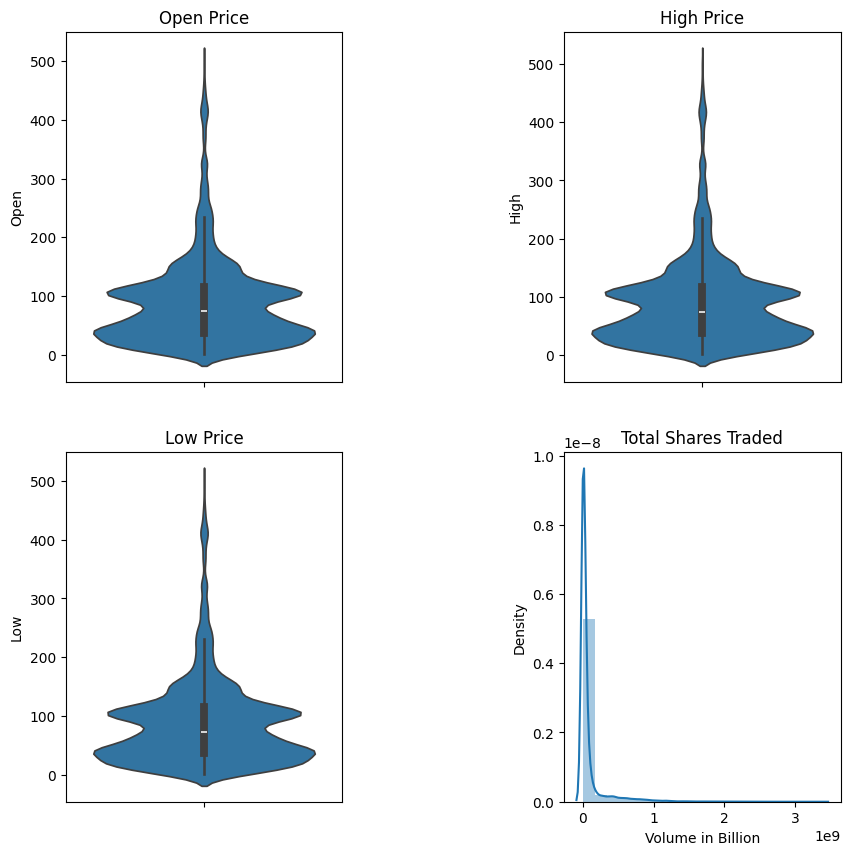

In [28]:
#Outliers Detection
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
plt.subplots_adjust(wspace=0.8)
sns.violinplot(data["Open"],ax=ax[0,0])
sns.violinplot(data["High"],ax=ax[0,1])
sns.violinplot(data["Low"],ax=ax[1,0])
sns.distplot(data["Volume"],ax=ax[1,1],bins=20,kde=True)
ax[0,0].set_title("Open Price")
ax[0,1].set_title("High Price")
ax[1,0].set_title("Low Price")
ax[1,1].set_title("Total Shares Traded")
ax[1,1].set_xlabel("Volume in Billion")
plt.show()

In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,25135.000000,25135.000000,25135.000000,25135.000000,2.513500e+04
mean,89.154082,89.966170,88.345271,89.186459,8.697261e+07
std,74.835931,75.524498,74.159757,74.891146,2.214944e+08
min,1.277003,1.292330,1.262877,1.281811,1.074765e+06
25%,37.357767,37.646806,37.006207,37.357275,6.285770e+06
50%,74.001180,74.573833,73.392458,73.985695,1.249051e+07
75%,115.985739,116.779608,115.055060,115.905914,4.994153e+07
max,503.049988,508.299988,502.790009,505.820007,3.372970e+09


In [7]:
#Renaming Stocks Names
stocks = list()
for i,j in enumerate(data["Stocks"]):
    if j=="AAPL":
        data.loc[i,"Stocks"]="Apple"
    elif j=="MSFT":
        data.loc[i,"Stocks"]="Microsoft"
    elif j=="JNJ":
        data.loc[i,"Stocks"]="Johnson&Johnson"
    else:
        data.loc[i,"Stocks"]="GeneralElectric"

In [8]:
data

,Date,Open,High,Low,Close,Volume,Stocks
0,2005-07-21,1.313367,1.323586,1.289324,1.301045,404264000,Apple
1,2005-07-22,1.305554,1.322385,1.304051,1.322385,301106400,Apple
2,2005-07-25,1.322084,1.330800,1.314270,1.316674,294627200,Apple
3,2005-07-26,1.322685,1.325690,1.303149,1.311264,268592800,Apple
4,2005-07-27,1.317275,1.324488,1.282412,1.322083,283749200,Apple
...,...,...,...,...,...,...,...
25130,2025-07-09,155.789993,156.690002,155.070007,156.279999,6147400,Johnson&Johnson
25131,2025-07-10,156.100006,159.240005,155.820007,157.690002,6732900,Johnson&Johnson
25132,2025-07-11,157.089996,157.179993,155.179993,156.899994,7872000,Johnson&Johnson
25133,2025-07-14,156.869995,157.470001,155.520004,156.820007,10185600,Johnson&Johnson


In [9]:
#Arranging DataSet
Data = pd.concat([data["Stocks"],data.iloc[:,[0,1,2,3,5]],data.iloc[:,[4]]],axis=1)
Data

,Stocks,Date,Open,High,Low,Volume,Close
0,Apple,2005-07-21,1.313367,1.323586,1.289324,404264000,1.301045
1,Apple,2005-07-22,1.305554,1.322385,1.304051,301106400,1.322385
2,Apple,2005-07-25,1.322084,1.330800,1.314270,294627200,1.316674
3,Apple,2005-07-26,1.322685,1.325690,1.303149,268592800,1.311264
4,Apple,2005-07-27,1.317275,1.324488,1.282412,283749200,1.322083
...,...,...,...,...,...,...,...
25130,Johnson&Johnson,2025-07-09,155.789993,156.690002,155.070007,6147400,156.279999
25131,Johnson&Johnson,2025-07-10,156.100006,159.240005,155.820007,6732900,157.690002
25132,Johnson&Johnson,2025-07-11,157.089996,157.179993,155.179993,7872000,156.899994
25133,Johnson&Johnson,2025-07-14,156.869995,157.470001,155.520004,10185600,156.820007


In [35]:
Data.corr(numeric_only=True)

,Open,High,Low,Volume,Close
Open,1.000000,0.999904,0.999904,-0.320055,0.999808
High,0.999904,1.000000,0.999860,-0.319619,0.999908
Low,0.999904,0.999860,1.000000,-0.320537,0.999905
Volume,-0.320055,-0.319619,-0.320537,1.000000,-0.319987
Close,0.999808,0.999908,0.999905,-0.319987,1.000000


In [46]:
for i,j in Data.groupby("Stocks"):
    d=j.sort_values("Date")
    break

In [47]:
d

,Stocks,Date,Open,High,Low,Volume,Close
0,Apple,2005-07-21,1.313367,1.323586,1.289324,404264000,1.301045
1,Apple,2005-07-22,1.305554,1.322385,1.304051,301106400,1.322385
2,Apple,2005-07-25,1.322084,1.330800,1.314270,294627200,1.316674
3,Apple,2005-07-26,1.322685,1.325690,1.303149,268592800,1.311264
4,Apple,2005-07-27,1.317275,1.324488,1.282412,283749200,1.322083
...,...,...,...,...,...,...,...
5022,Apple,2025-07-09,209.529999,211.330002,207.220001,48749400,211.139999
5023,Apple,2025-07-10,210.509995,213.479996,210.029999,44443600,212.410004
5024,Apple,2025-07-11,210.570007,212.130005,209.860001,39765800,211.160004
5025,Apple,2025-07-14,209.929993,210.910004,207.539993,38840100,208.619995


<h1><b>FINAL REPORT: DATA-VALIDATION</b></h1>
<li>No Null Values Detected</li>
<li>No Duplication of samples</li>
<li>Outliers Detected in Features</li>